In [60]:
import pandas as pd
dfp = pd.read_csv('positive.csv')
dfn = pd.read_csv('negative.csv')

In [70]:
df = dfp.append(dfn)

/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/1268458048.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfp.append(dfn)


In [71]:
df

,Sentiment,tokens_text
0,Positive,hey guys didknow isfarming game love know check read also visit website
1,Positive,anxiety read dealing anxiety tough helpful linksfound maybe helpful ease cure wishing best year
2,Positive,sneak peak absolutely dope vehicle get ready gaming
3,Positive,wouldnwant miss join session
4,Positive,excellent future strong teamtransparent planned roadmap successfuli
...,...,...
995,Negative,expands lawsuits could soon follow national law journal
996,Negative,going insane
997,Negative,anyone else notice mainstream media pumped hell coins like squid coins others past month think
998,Negative,ignoring dreem would behuge mistake stillsmall cap comparison others withlot focus massive


In [78]:
df = df.replace({'Positive': 0, 'Negative': 1})

In [79]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df.tokens_text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [80]:
df2 = pd.DataFrame(X.toarray(),columns=words)

In [81]:
X = df2
y = pd.DataFrame(df['Sentiment'])

In [82]:
y

,Sentiment
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [94]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


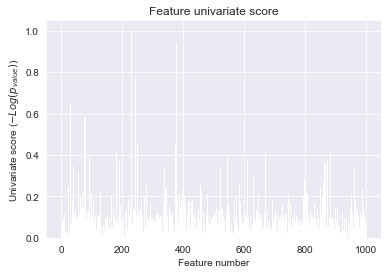

In [95]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [98]:
sum(scores>0.2)

54

In [102]:
X = X.loc[:,X.columns[scores>0.2]]

In [103]:
X

,alert,amazing,apes,avatar,battle,best,better,bored,breakout,chance,community,cool,crazy,create,discord,drop,earn,excited,exciting,friends,fun,gain,good,great,growing,gun,hard,hell,interesting,invest,join,like,love,low,missed,nice,opportunity,pay,play,resistance,shit,sick,sin,stop,success,super,support,tag,team,thank,thanks,war,welcome,wrong
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.34733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.355321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.589918,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32975,0.0,0.0,0.000000,0.225629,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Gradient Boosting


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8254    0.5200    0.6380       100
           1     0.6496    0.8900    0.7511       100

    accuracy                         0.7050       200
   macro avg     0.7375    0.7050    0.6945       200
weighted avg     0.7375    0.7050    0.6945       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9104    0.6100    0.7305       100
           1     0.7068    0.9400    0.8069       100

    accuracy                         0.7750       200
   macro avg     0.8086    0.7750    0.7687       200
weighted avg     0.8086    0.7750    0.7687       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9500    0.5700    0.7125       100
           1     0.6929    0.9700    0.8083       100

    accuracy                         0.7700       200
   macro avg     0.8214    0.7700    0.7604       200
weighted avg     0.8214    0.7700    0.7604       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8772    0.5000    0.6369       100
           1     0.6503    0.9300    0.7654       100

    accuracy                         0.7150       200
   macro avg     0.7638    0.7150    0.7012       200
weighted avg     0.7638    0.7150    0.7012       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8548    0.5300    0.6543       100
           1     0.6594    0.9100    0.7647       100

    accuracy                         0.7200       200
   macro avg     0.7571    0.7200    0.7095       200
weighted avg     0.7571    0.7200    0.7095       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8889    0.5600    0.6871       100
           1     0.6788    0.9300    0.7848       100

    accuracy                         0.7450       200
   macro avg     0.7839    0.7450    0.7360       200
weighted avg     0.7839    0.7450    0.7360       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9483    0.5500    0.6962       100
           1     0.6831    0.9700    0.8017       100

    accuracy                         0.7600       200
   macro avg     0.8157    0.7600    0.7489       200
weighted avg     0.8157    0.7600    0.7489       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9242    0.6100    0.7349       100
           1     0.7090    0.9500    0.8120       100

    accuracy                         0.7800       200
   macro avg     0.8166    0.7800    0.7735       200
weighted avg     0.8166    0.7800    0.7735       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9077    0.5900    0.7152       100
           1     0.6963    0.9400    0.8000       100

    accuracy                         0.7650       200
   macro avg     0.8020    0.7650    0.7576       200
weighted avg     0.8020    0.7650    0.7576       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9828    0.5700    0.7215       100
           1     0.6972    0.9900    0.8182       100

    accuracy                         0.7800       200
   macro avg     0.8400    0.7800    0.7699       200
weighted avg     0.8400    0.7800    0.7699       200

Nearest Neighbors
              precision    recall  f1-score   support

           0     0.5723    0.9500    0.7143       100
           1     0.8529    0.2900    0.4328       100

    accuracy                         0.6200       200
   macro avg     0.7126    0.6200    0.5736       200
weighted avg     0.7126    0.6200    0.5736       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6154    0.9600    0.7500       100
           1     0.9091    0.4000    0.5556       100

    accuracy                         0.6800       200
   macro avg     0.7622    0.6800    0.6528       200
weighted avg     0.7622    0.6800    0.6528       200

              precision    recall  f1-score   support

           0     0.5767    0.9400    0.7148       100
           1     0.8378    0.3100    0.4526       100

    accuracy                         0.6250       200
   macro avg     0.7073    0.6250    0.5837       200
weighted avg     0.7073    0.6250    0.5837       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6049    0.9800    0.7481       100
           1     0.9474    0.3600    0.5217       100

    accuracy                         0.6700       200
   macro avg     0.7762    0.6700    0.6349       200
weighted avg     0.7762    0.6700    0.6349       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6178    0.9700    0.7549       100
           1     0.9302    0.4000    0.5594       100

    accuracy                         0.6850       200
   macro avg     0.7740    0.6850    0.6572       200
weighted avg     0.7740    0.6850    0.6572       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6250    0.9500    0.7540       100
           1     0.8958    0.4300    0.5811       100

    accuracy                         0.6900       200
   macro avg     0.7604    0.6900    0.6675       200
weighted avg     0.7604    0.6900    0.6675       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6065    0.9400    0.7373       100
           1     0.8667    0.3900    0.5379       100

    accuracy                         0.6650       200
   macro avg     0.7366    0.6650    0.6376       200
weighted avg     0.7366    0.6650    0.6376       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.5875    0.9400    0.7231       100
           1     0.8500    0.3400    0.4857       100

    accuracy                         0.6400       200
   macro avg     0.7188    0.6400    0.6044       200
weighted avg     0.7188    0.6400    0.6044       200

              precision    recall  f1-score   support

           0     0.6104    0.9400    0.7402       100
           1     0.8696    0.4000    0.5479       100

    accuracy                         0.6700       200
   macro avg     0.7400    0.6700    0.6441       200
weighted avg     0.7400    0.6700    0.6441       200



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0     0.6013    0.9200    0.7273       100
           1     0.8298    0.3900    0.5306       100

    accuracy                         0.6550       200
   macro avg     0.7155    0.6550    0.6289       200
weighted avg     0.7155    0.6550    0.6289       200

Linear SVM


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8235    0.5600    0.6667       100
           1     0.6667    0.8800    0.7586       100

    accuracy                         0.7200       200
   macro avg     0.7451    0.7200    0.7126       200
weighted avg     0.7451    0.7200    0.7126       200

              precision    recall  f1-score   support

           0     0.9143    0.6400    0.7529       100
           1     0.7231    0.9400    0.8174       100

    accuracy                         0.7900       200
   macro avg     0.8187    0.7900    0.7852       200
weighted avg     0.8187    0.7900    0.7852       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9242    0.6100    0.7349       100
           1     0.7090    0.9500    0.8120       100

    accuracy                         0.7800       200
   macro avg     0.8166    0.7800    0.7735       200
weighted avg     0.8166    0.7800    0.7735       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.5818    0.9600    0.7245       100
           1     0.8857    0.3100    0.4593       100

    accuracy                         0.6350       200
   macro avg     0.7338    0.6350    0.5919       200
weighted avg     0.7338    0.6350    0.5919       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8657    0.5800    0.6946       100
           1     0.6842    0.9100    0.7811       100

    accuracy                         0.7450       200
   macro avg     0.7749    0.7450    0.7379       200
weighted avg     0.7749    0.7450    0.7379       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.6164    0.9800    0.7568       100
           1     0.9512    0.3900    0.5532       100

    accuracy                         0.6850       200
   macro avg     0.7838    0.6850    0.6550       200
weighted avg     0.7838    0.6850    0.6550       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.6111    0.9900    0.7557       100
           1     0.9737    0.3700    0.5362       100

    accuracy                         0.6800       200
   macro avg     0.7924    0.6800    0.6460       200
weighted avg     0.7924    0.6800    0.6460       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9041    0.6600    0.7630       100
           1     0.7323    0.9300    0.8194       100

    accuracy                         0.7950       200
   macro avg     0.8182    0.7950    0.7912       200
weighted avg     0.8182    0.7950    0.7912       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.6101    0.9700    0.7490       100
           1     0.9268    0.3800    0.5390       100

    accuracy                         0.6750       200
   macro avg     0.7684    0.6750    0.6440       200
weighted avg     0.7684    0.6750    0.6440       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.6149    0.9900    0.7586       100
           1     0.9744    0.3800    0.5468       100

    accuracy                         0.6850       200
   macro avg     0.7946    0.6850    0.6527       200
weighted avg     0.7946    0.6850    0.6527       200

RBF SVM


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8358    0.5600    0.6707       100
           1     0.6692    0.8900    0.7639       100

    accuracy                         0.7250       200
   macro avg     0.7525    0.7250    0.7173       200
weighted avg     0.7525    0.7250    0.7173       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9365    0.5900    0.7239       100
           1     0.7007    0.9600    0.8101       100

    accuracy                         0.7750       200
   macro avg     0.8186    0.7750    0.7670       200
weighted avg     0.8186    0.7750    0.7670       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9365    0.5900    0.7239       100
           1     0.7007    0.9600    0.8101       100

    accuracy                         0.7750       200
   macro avg     0.8186    0.7750    0.7670       200
weighted avg     0.8186    0.7750    0.7670       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9153    0.5400    0.6792       100
           1     0.6738    0.9500    0.7884       100

    accuracy                         0.7450       200
   macro avg     0.7945    0.7450    0.7338       200
weighted avg     0.7945    0.7450    0.7338       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8769    0.5700    0.6909       100
           1     0.6815    0.9200    0.7830       100

    accuracy                         0.7450       200
   macro avg     0.7792    0.7450    0.7369       200
weighted avg     0.7792    0.7450    0.7369       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8529    0.5800    0.6905       100
           1     0.6818    0.9000    0.7759       100

    accuracy                         0.7400       200
   macro avg     0.7674    0.7400    0.7332       200
weighted avg     0.7674    0.7400    0.7332       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9516    0.5900    0.7284       100
           1     0.7029    0.9700    0.8151       100

    accuracy                         0.7800       200
   macro avg     0.8273    0.7800    0.7718       200
weighted avg     0.8273    0.7800    0.7718       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9028    0.6500    0.7558       100
           1     0.7266    0.9300    0.8158       100

    accuracy                         0.7900       200
   macro avg     0.8147    0.7900    0.7858       200
weighted avg     0.8147    0.7900    0.7858       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8955    0.6000    0.7186       100
           1     0.6992    0.9300    0.7983       100

    accuracy                         0.7650       200
   macro avg     0.7974    0.7650    0.7584       200
weighted avg     0.7974    0.7650    0.7584       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9821    0.5500    0.7051       100
           1     0.6875    0.9900    0.8115       100

    accuracy                         0.7700       200
   macro avg     0.8348    0.7700    0.7583       200
weighted avg     0.8348    0.7700    0.7583       200

Gaussian Process


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8286    0.5800    0.6824       100
           1     0.6769    0.8800    0.7652       100

    accuracy                         0.7300       200
   macro avg     0.7527    0.7300    0.7238       200
weighted avg     0.7527    0.7300    0.7238       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9167    0.6600    0.7674       100
           1     0.7344    0.9400    0.8246       100

    accuracy                         0.8000       200
   macro avg     0.8255    0.8000    0.7960       200
weighted avg     0.8255    0.8000    0.7960       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9524    0.6000    0.7362       100
           1     0.7080    0.9700    0.8186       100

    accuracy                         0.7850       200
   macro avg     0.8302    0.7850    0.7774       200
weighted avg     0.8302    0.7850    0.7774       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9016    0.5500    0.6832       100
           1     0.6763    0.9400    0.7866       100

    accuracy                         0.7450       200
   macro avg     0.7889    0.7450    0.7349       200
weighted avg     0.7889    0.7450    0.7349       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8906    0.5700    0.6951       100
           1     0.6838    0.9300    0.7881       100

    accuracy                         0.7500       200
   macro avg     0.7872    0.7500    0.7416       200
weighted avg     0.7872    0.7500    0.7416       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8696    0.6000    0.7101       100
           1     0.6947    0.9100    0.7879       100

    accuracy                         0.7550       200
   macro avg     0.7821    0.7550    0.7490       200
weighted avg     0.7821    0.7550    0.7490       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9538    0.6200    0.7515       100
           1     0.7185    0.9700    0.8255       100

    accuracy                         0.7950       200
   macro avg     0.8362    0.7950    0.7885       200
weighted avg     0.8362    0.7950    0.7885       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9178    0.6700    0.7746       100
           1     0.7402    0.9400    0.8282       100

    accuracy                         0.8050       200
   macro avg     0.8290    0.8050    0.8014       200
weighted avg     0.8290    0.8050    0.8014       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8841    0.6100    0.7219       100
           1     0.7023    0.9200    0.7965       100

    accuracy                         0.7650       200
   macro avg     0.7932    0.7650    0.7592       200
weighted avg     0.7932    0.7650    0.7592       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9508    0.5800    0.7205       100
           1     0.6978    0.9700    0.8117       100

    accuracy                         0.7750       200
   macro avg     0.8243    0.7750    0.7661       200
weighted avg     0.8243    0.7750    0.7661       200

Decision Tree
              precision    recall  f1-score   support

           0     0.8333    0.1500    0.2542       100
           1     0.5330    0.9700    0.6879       100

    accuracy                         0.5600       200
   macro avg     0.6832    0.5600    0.4711       200
weighted avg     0.6832    0.5600    0.4711       200

              precision    recall  f1-score   support

           0     0.8261    0.1900    0.3089       100
           1     0.5424    0.9600    0.6931       100

    accuracy                         0.5750       200
   macro avg     0.6842    0.5750    0.5010       200
weighted avg     0.6842    0.5750    0.5010       200

     

/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0     0.6025    0.9700    0.7433       100
           1     0.9231    0.3600    0.5180       100

    accuracy                         0.6650       200
   macro avg     0.7628    0.6650    0.6306       200
weighted avg     0.7628    0.6650    0.6306       200

              precision    recall  f1-score   support

           0     0.8980    0.4400    0.5906       100
           1     0.6291    0.9500    0.7570       100

    accuracy                         0.6950       200
   macro avg     0.7635    0.6950    0.6738       200
weighted avg     0.7635    0.6950    0.6738       200

              precision    recall  f1-score   support

           0     0.8684    0.3300    0.4783       100
           1     0.5864    0.9500    0.7252       100

    accuracy                         0.6400       200
   macro avg     0.7274    0.6400    0.6017       200
weighted avg     0.7274    0.6400    0.6017       200



/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0     0.8980    0.4400    0.5906       100
           1     0.6291    0.9500    0.7570       100

    accuracy                         0.6950       200
   macro avg     0.7635    0.6950    0.6738       200
weighted avg     0.7635    0.6950    0.6738       200

              precision    recall  f1-score   support

           0     0.8810    0.3700    0.5211       100
           1     0.6013    0.9500    0.7364       100

    accuracy                         0.6600       200
   macro avg     0.7411    0.6600    0.6288       200
weighted avg     0.7411    0.6600    0.6288       200



/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0     0.5882    1.0000    0.7407       100
           1     1.0000    0.3000    0.4615       100

    accuracy                         0.6500       200
   macro avg     0.7941    0.6500    0.6011       200
weighted avg     0.7941    0.6500    0.6011       200

              precision    recall  f1-score   support

           0     0.9167    0.4400    0.5946       100
           1     0.6316    0.9600    0.7619       100

    accuracy                         0.7000       200
   macro avg     0.7741    0.7000    0.6782       200
weighted avg     0.7741    0.7000    0.6782       200



/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0     0.8667    0.5200    0.6500       100
           1     0.6571    0.9200    0.7667       100

    accuracy                         0.7200       200
   macro avg     0.7619    0.7200    0.7083       200
weighted avg     0.7619    0.7200    0.7083       200

              precision    recall  f1-score   support

           0     0.9583    0.4600    0.6216       100
           1     0.6447    0.9800    0.7778       100

    accuracy                         0.7200       200
   macro avg     0.8015    0.7200    0.6997       200
weighted avg     0.8015    0.7200    0.6997       200

Neural Net


/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_35412/2143170960.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8382    0.5700    0.6786       100
           1     0.6742    0.8900    0.7672       100

    accuracy                         0.7300       200
   macro avg     0.7562    0.7300    0.7229       200
weighted avg     0.7562    0.7300    0.7229       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9143    0.6400    0.7529       100
           1     0.7231    0.9400    0.8174       100

    accuracy                         0.7900       200
   macro avg     0.8187    0.7900    0.7852       200
weighted avg     0.8187    0.7900    0.7852       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9375    0.6000    0.7317       100
           1     0.7059    0.9600    0.8136       100

    accuracy                         0.7800       200
   macro avg     0.8217    0.7800    0.7726       200
weighted avg     0.8217    0.7800    0.7726       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8983    0.5300    0.6667       100
           1     0.6667    0.9400    0.7801       100

    accuracy                         0.7350       200
   macro avg     0.7825    0.7350    0.7234       200
weighted avg     0.7825    0.7350    0.7234       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8923    0.5800    0.7030       100
           1     0.6889    0.9300    0.7915       100

    accuracy                         0.7550       200
   macro avg     0.7906    0.7550    0.7473       200
weighted avg     0.7906    0.7550    0.7473       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8676    0.5900    0.7024       100
           1     0.6894    0.9100    0.7845       100

    accuracy                         0.7500       200
   macro avg     0.7785    0.7500    0.7434       200
weighted avg     0.7785    0.7500    0.7434       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9538    0.6200    0.7515       100
           1     0.7185    0.9700    0.8255       100

    accuracy                         0.7950       200
   macro avg     0.8362    0.7950    0.7885       200
weighted avg     0.8362    0.7950    0.7885       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9178    0.6700    0.7746       100
           1     0.7402    0.9400    0.8282       100

    accuracy                         0.8050       200
   macro avg     0.8290    0.8050    0.8014       200
weighted avg     0.8290    0.8050    0.8014       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.8841    0.6100    0.7219       100
           1     0.7023    0.9200    0.7965       100

    accuracy                         0.7650       200
   macro avg     0.7932    0.7650    0.7592       200
weighted avg     0.7932    0.7650    0.7592       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9524    0.6000    0.7362       100
           1     0.7080    0.9700    0.8186       100

    accuracy                         0.7850       200
   macro avg     0.8302    0.7850    0.7774       200
weighted avg     0.8302    0.7850    0.7774       200

AdaBoost
              precision    recall  f1-score   support

           0     0.8387    0.5200    0.6420       100
           1     0.6522    0.9000    0.7563       100

    accuracy                         0.7100       200
   macro avg     0.7454    0.7100    0.6991       200
weighted avg     0.7454    0.7100    0.6991       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9118    0.6200    0.7381       100
           1     0.7121    0.9400    0.8103       100

    accuracy                         0.7800       200
   macro avg     0.8119    0.7800    0.7742       200
weighted avg     0.8119    0.7800    0.7742       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9333    0.5600    0.7000       100
           1     0.6857    0.9600    0.8000       100

    accuracy                         0.7600       200
   macro avg     0.8095    0.7600    0.7500       200
weighted avg     0.8095    0.7600    0.7500       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9444    0.5100    0.6623       100
           1     0.6644    0.9700    0.7886       100

    accuracy                         0.7400       200
   macro avg     0.8044    0.7400    0.7255       200
weighted avg     0.8044    0.7400    0.7255       200

              precision    recall  f1-score   support

           0     0.9138    0.5300    0.6709       100
           1     0.6690    0.9500    0.7851       100

    accuracy                         0.7400       200
   macro avg     0.7914    0.7400    0.7280       200
weighted avg     0.7914    0.7400    0.7280       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9032    0.5600    0.6914       100
           1     0.6812    0.9400    0.7899       100

    accuracy                         0.7500       200
   macro avg     0.7922    0.7500    0.7406       200
weighted avg     0.7922    0.7500    0.7406       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9500    0.5700    0.7125       100
           1     0.6929    0.9700    0.8083       100

    accuracy                         0.7700       200
   macro avg     0.8214    0.7700    0.7604       200
weighted avg     0.8214    0.7700    0.7604       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9500    0.5700    0.7125       100
           1     0.6929    0.9700    0.8083       100

    accuracy                         0.7700       200
   macro avg     0.8214    0.7700    0.7604       200
weighted avg     0.8214    0.7700    0.7604       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9077    0.5900    0.7152       100
           1     0.6963    0.9400    0.8000       100

    accuracy                         0.7650       200
   macro avg     0.8020    0.7650    0.7576       200
weighted avg     0.8020    0.7650    0.7576       200

              precision    recall  f1-score   support

           0     0.9818    0.5400    0.6968       100
           1     0.6828    0.9900    0.8082       100

    accuracy                         0.7650       200
   macro avg     0.8323    0.7650    0.7525       200
weighted avg     0.8323    0.7650    0.7525       200

Naive Bayes


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9091    0.5000    0.6452       100
           1     0.6552    0.9500    0.7755       100

    accuracy                         0.7250       200
   macro avg     0.7821    0.7250    0.7103       200
weighted avg     0.7821    0.7250    0.7103       200

              precision    recall  f1-score   support

           0     0.9184    0.4500    0.6040       100
           1     0.6358    0.9600    0.7649       100

    accuracy                         0.7050       200
   macro avg     0.7771    0.7050    0.6845       200
weighted avg     0.7771    0.7050    0.6845       200

              precision    recall  f1-score   support

           0     0.9444    0.5100    0.6623       100
           1     0.6644    0.9700    0.7886       100

    accuracy                         0.7400       200
   macro avg     0.8044    0.7400    0.7255       200
weighted avg     0.8044    0.7400    0.7255       200

              preci

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

              precision    recall  f1-score   support

           0     0.9057    0.4800    0.6275       100
           1     0.6463    0.9500    0.7692       100

    accuracy                         0.7150       200
   macro avg     0.7760    0.7150    0.6983       200
weighted avg     0.7760    0.7150    0.6983       200

              precision    recall  f1-score   support

           0     0.9787    0.4600    0.6259       100
           1     0.6471    0.9900    0.7826       100

    accuracy                         0.7250       200
   macro avg     0.8129    0.7250    0.7042       200
weighted avg     0.8129    0.7250    0.7042       200

              precision    recall  f1-score   support

           0     0.9672    0.5900    0.7329       100
           1     0.7050    0.9800    0.8201       100

    accuracy                         0.7850       200
   macro avg     0.8361    0.7850    0.7765       200
weighted avg     0.8361    0.7850    0.7765       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9273    0.5100    0.6581       100
           1     0.6621    0.9600    0.7837       100

    accuracy                         0.7350       200
   macro avg     0.7947    0.7350    0.7209       200
weighted avg     0.7947    0.7350    0.7209       200

              precision    recall  f1-score   support

           0     0.9800    0.4900    0.6533       100
           1     0.6600    0.9900    0.7920       100

    accuracy                         0.7400       200
   macro avg     0.8200    0.7400    0.7227       200
weighted avg     0.8200    0.7400    0.7227       200

QDA


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: U

              precision    recall  f1-score   support

           0     0.8913    0.4100    0.5616       100
           1     0.6169    0.9500    0.7480       100

    accuracy                         0.6800       200
   macro avg     0.7541    0.6800    0.6548       200
weighted avg     0.7541    0.6800    0.6548       200

              precision    recall  f1-score   support

           0     0.9111    0.4100    0.5655       100
           1     0.6194    0.9600    0.7529       100

    accuracy                         0.6850       200
   macro avg     0.7652    0.6850    0.6592       200
weighted avg     0.7652    0.6850    0.6592       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9600    0.4800    0.6400       100
           1     0.6533    0.9800    0.7840       100

    accuracy                         0.7300       200
   macro avg     0.8067    0.7300    0.7120       200
weighted avg     0.8067    0.7300    0.7120       200

              precision    recall  f1-score   support

           0     0.9024    0.3700    0.5248       100
           1     0.6038    0.9600    0.7413       100

    accuracy                         0.6650       200
   macro avg     0.7531    0.6650    0.6331       200
weighted avg     0.7531    0.6650    0.6331       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9600    0.4800    0.6400       100
           1     0.6533    0.9800    0.7840       100

    accuracy                         0.7300       200
   macro avg     0.8067    0.7300    0.7120       200
weighted avg     0.8067    0.7300    0.7120       200

              precision    recall  f1-score   support

           0     0.9412    0.4800    0.6358       100
           1     0.6510    0.9700    0.7791       100

    accuracy                         0.7250       200
   macro avg     0.7961    0.7250    0.7074       200
weighted avg     0.7961    0.7250    0.7074       200



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     0.9762    0.4100    0.5775       100
           1     0.6266    0.9900    0.7674       100

    accuracy                         0.7000       200
   macro avg     0.8014    0.7000    0.6725       200
weighted avg     0.8014    0.7000    0.6725       200

              precision    recall  f1-score   support

           0     0.9818    0.5400    0.6968       100
           1     0.6828    0.9900    0.8082       100

    accuracy                         0.7650       200
   macro avg     0.8323    0.7650    0.7525       200
weighted avg     0.8323    0.7650    0.7525       200

              precision    recall  f1-score   support

           0     0.9245    0.4900    0.6405       100
           1     0.6531    0.9600    0.7773       100

    accuracy                         0.7250       200
   macro avg     0.7888    0.7250    0.7089       200
weighted avg     0.7888    0.7250    0.7089       200



/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9778    0.4400    0.6069       100
           1     0.6387    0.9900    0.7765       100

    accuracy                         0.7150       200
   macro avg     0.8082    0.7150    0.6917       200
weighted avg     0.8082    0.7150    0.6917       200



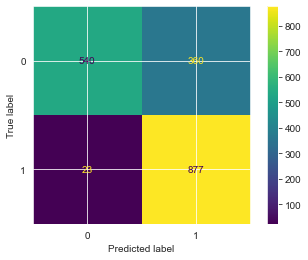

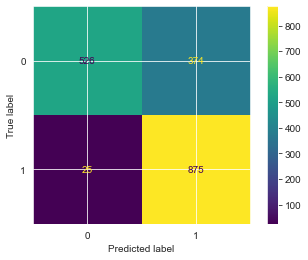

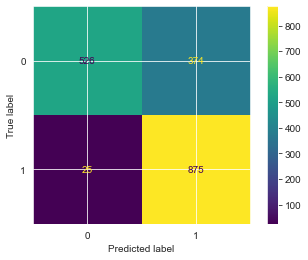

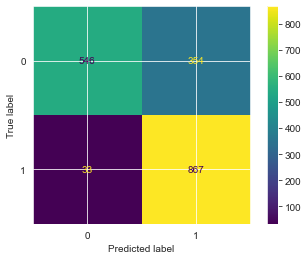

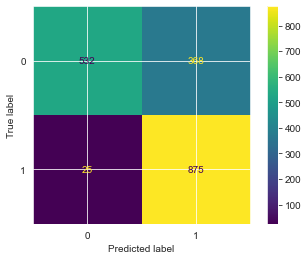

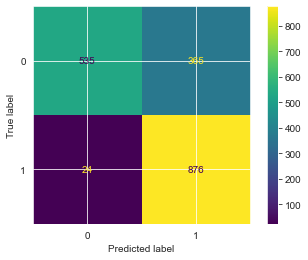

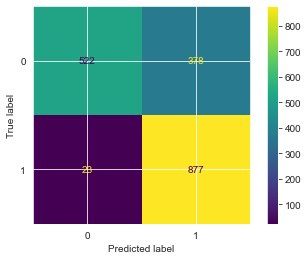

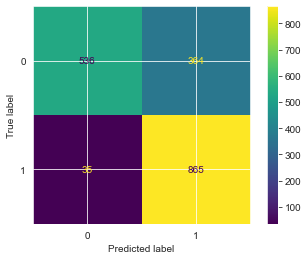

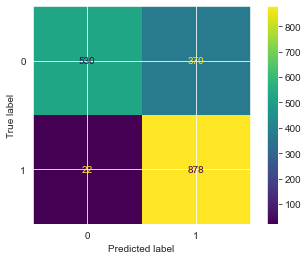

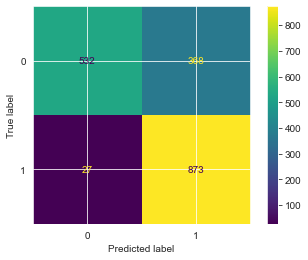

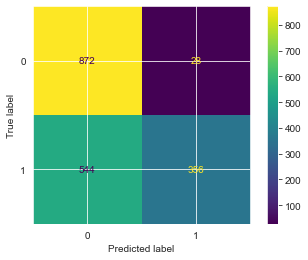

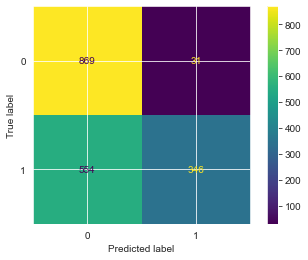

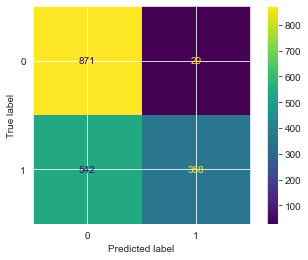

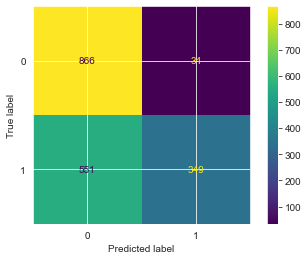

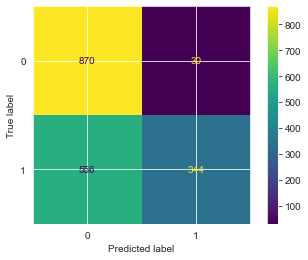

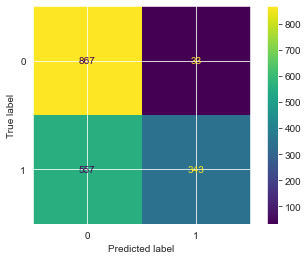

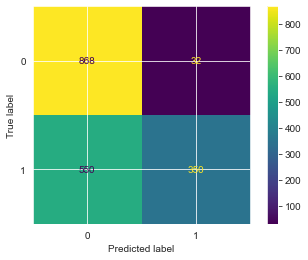

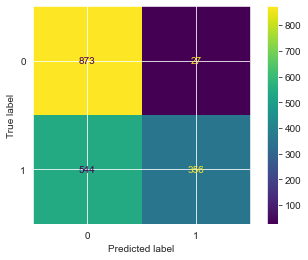

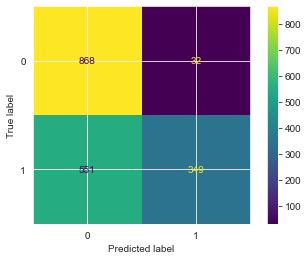

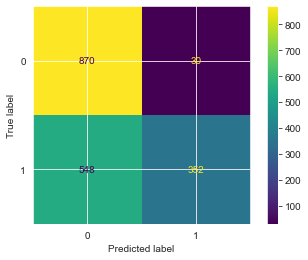

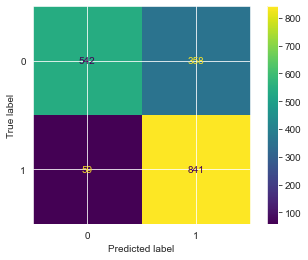

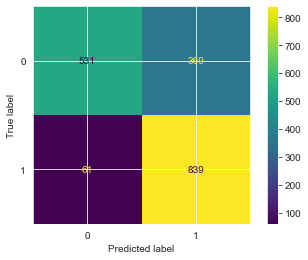

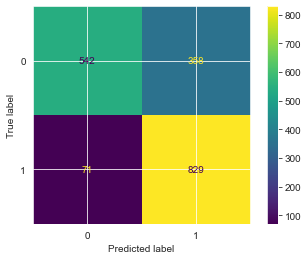

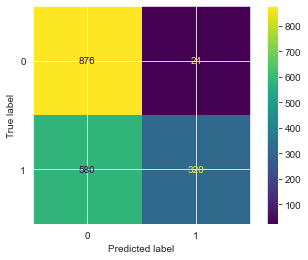

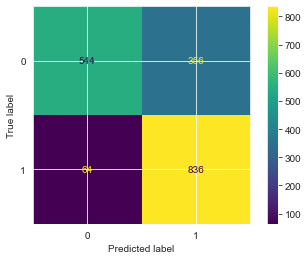

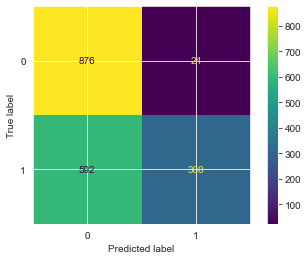

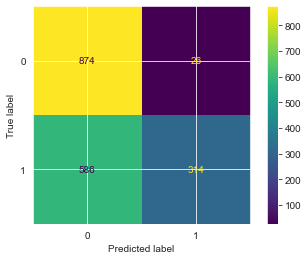

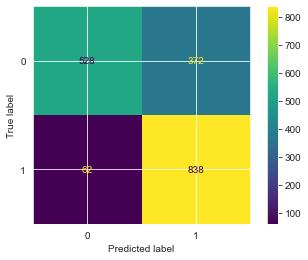

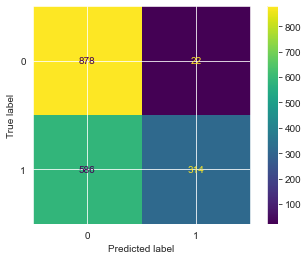

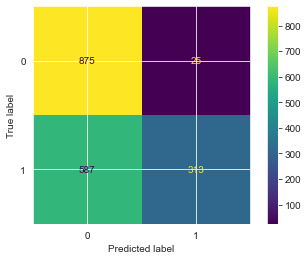

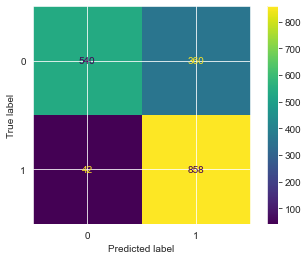

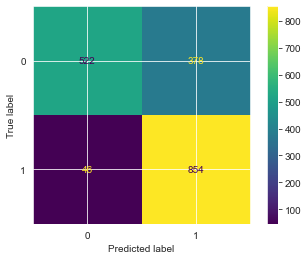

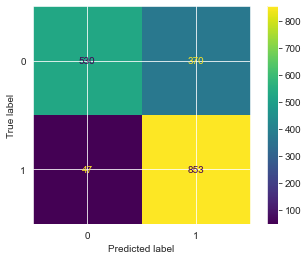

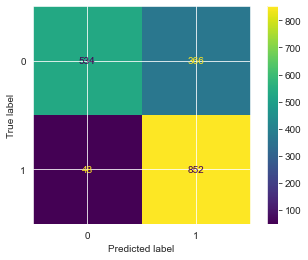

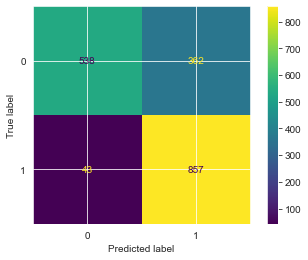

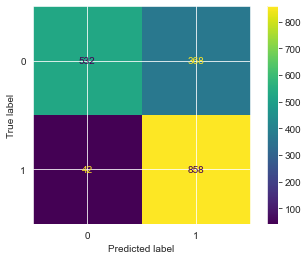

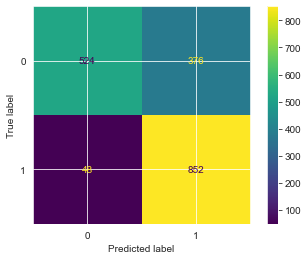

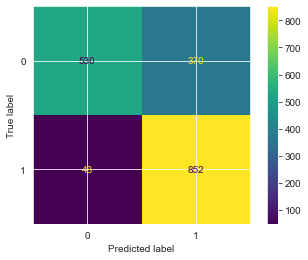

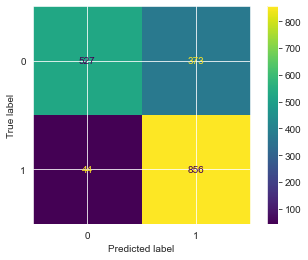

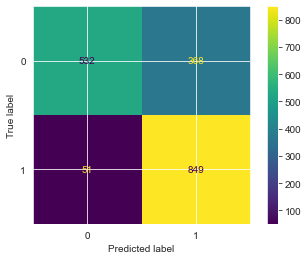

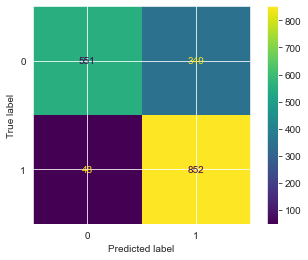

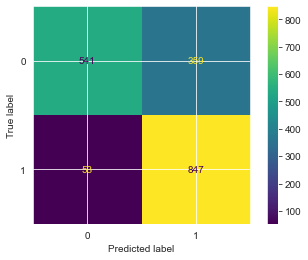

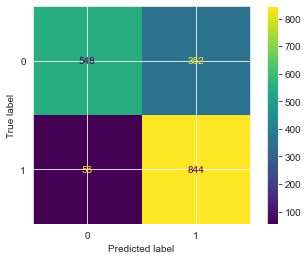

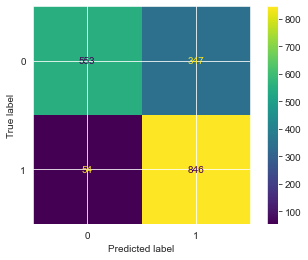

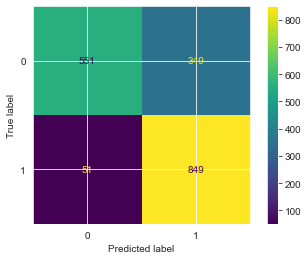

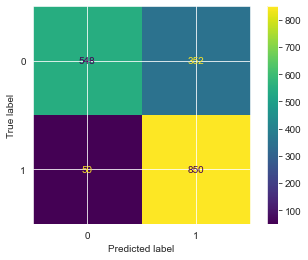

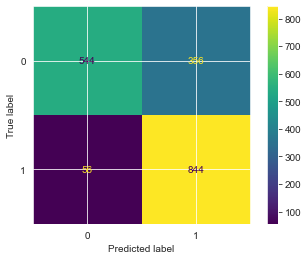

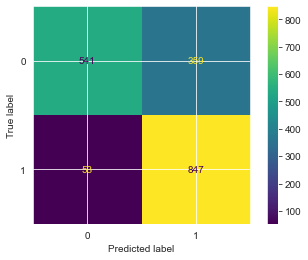

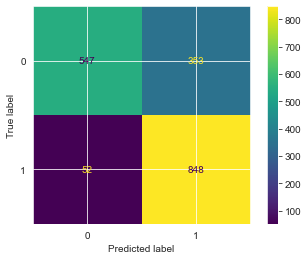

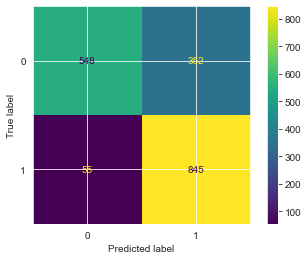

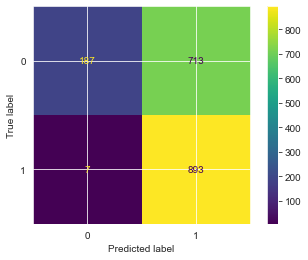

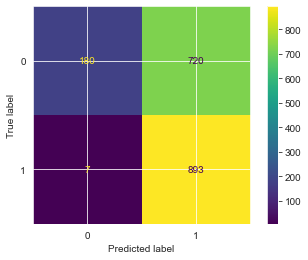

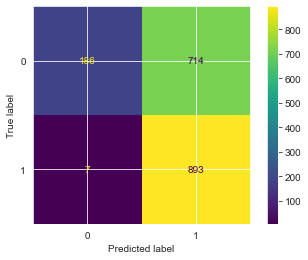

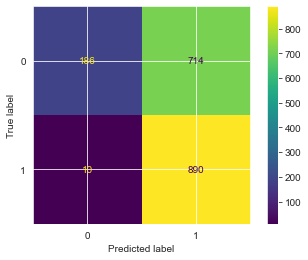

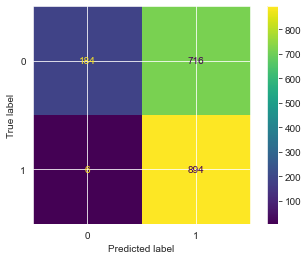

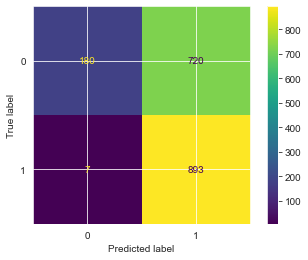

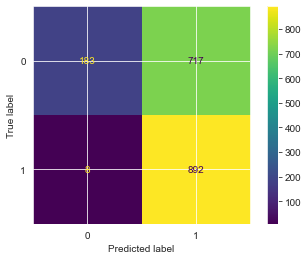

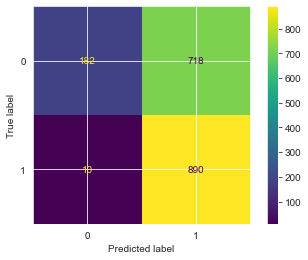

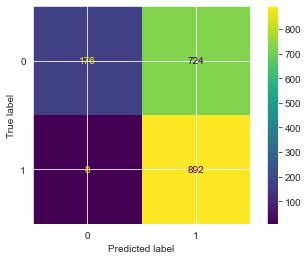

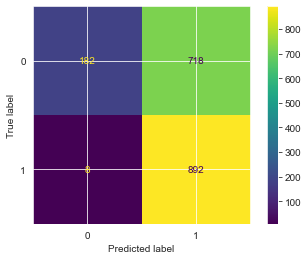

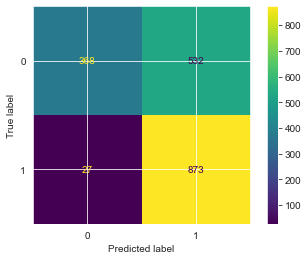

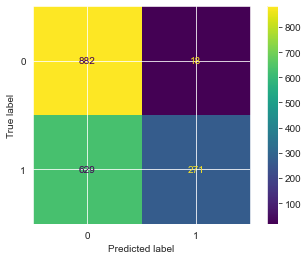

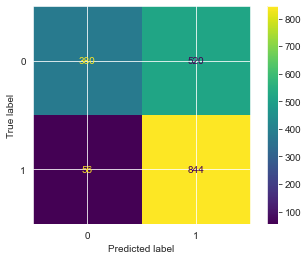

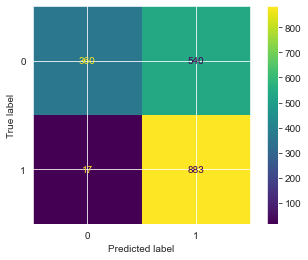

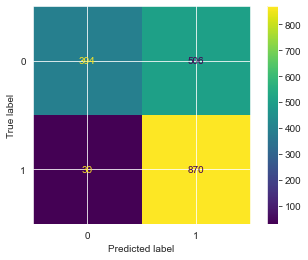

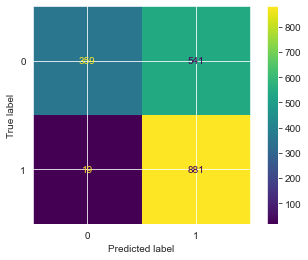

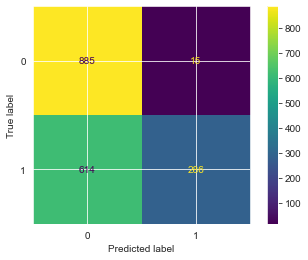

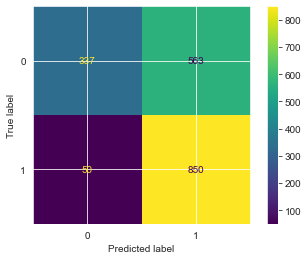

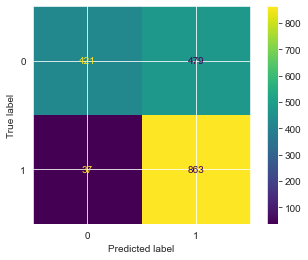

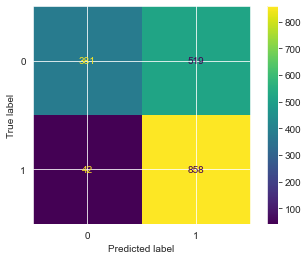

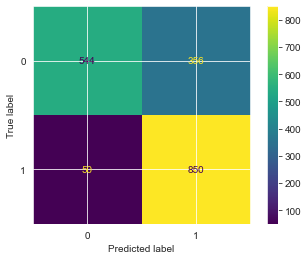

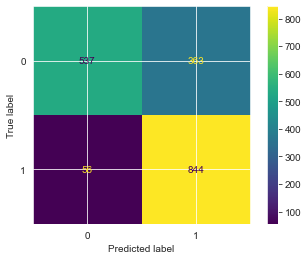

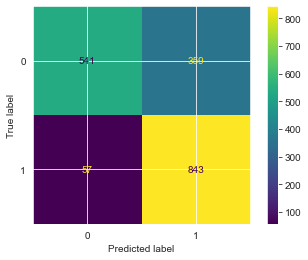

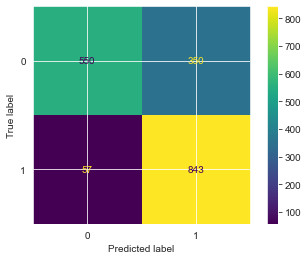

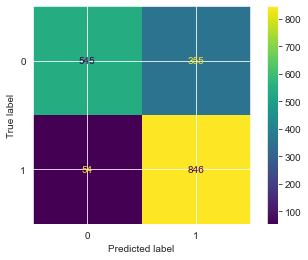

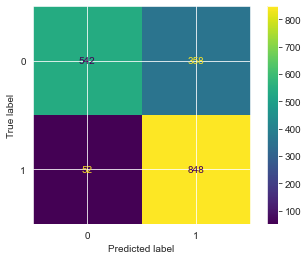

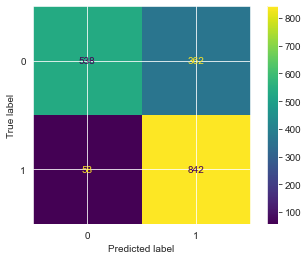

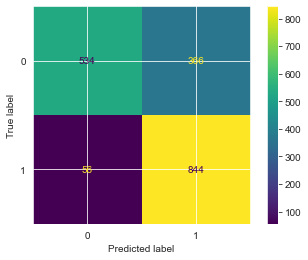

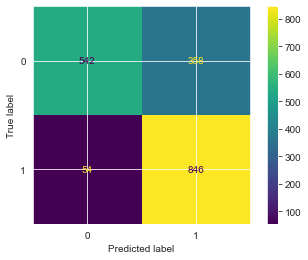

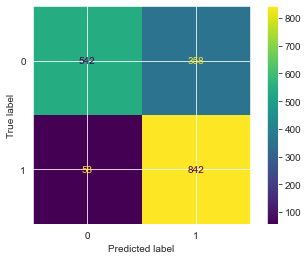

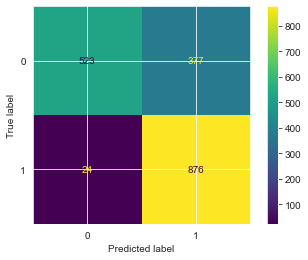

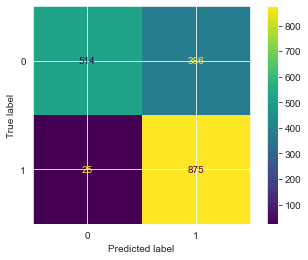

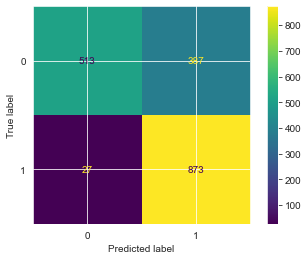

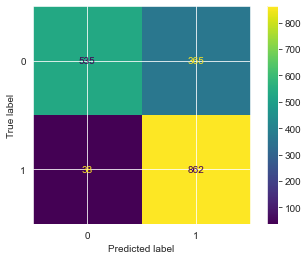

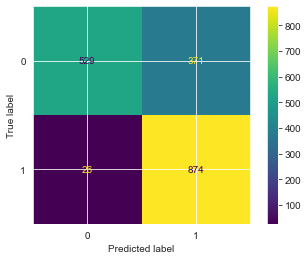

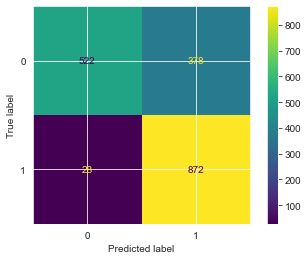

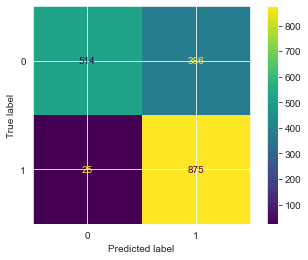

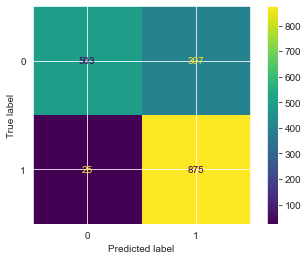

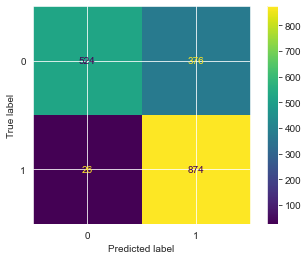

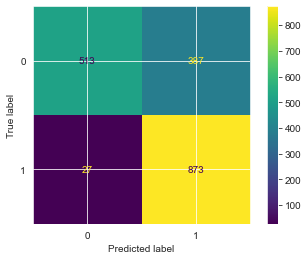

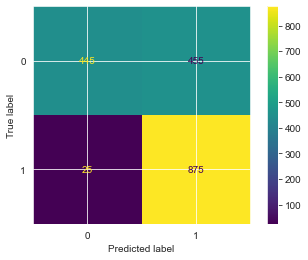

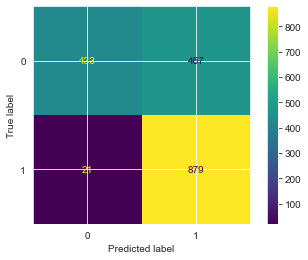

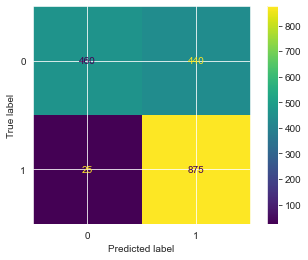

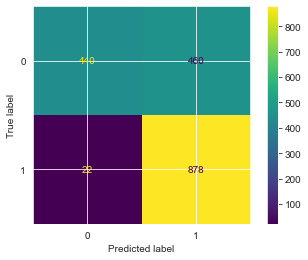

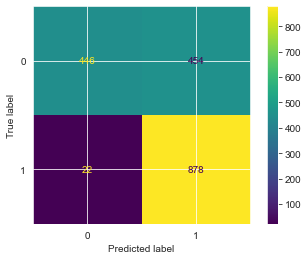

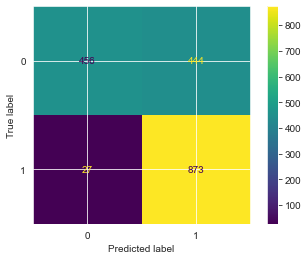

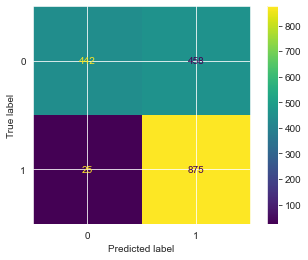

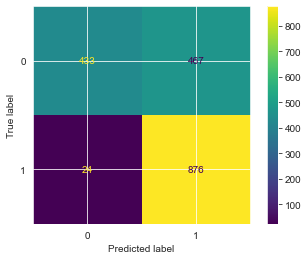

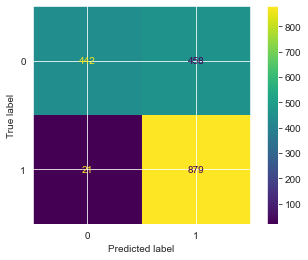

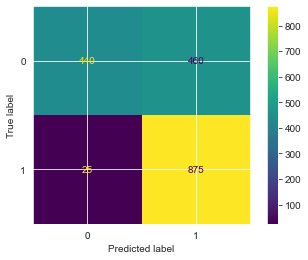

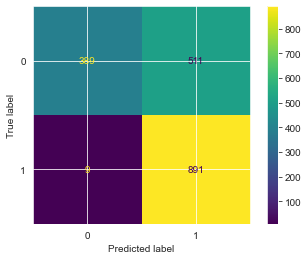

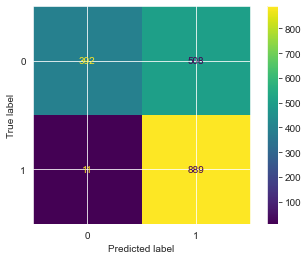

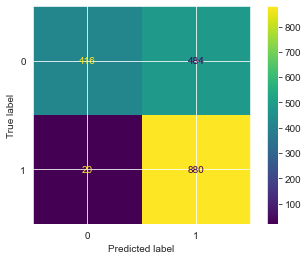

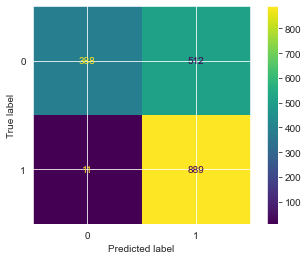

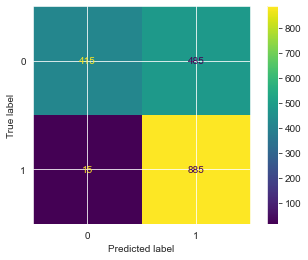

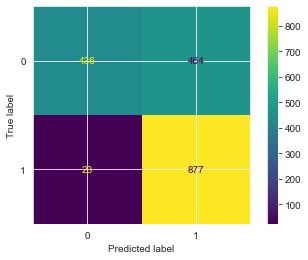

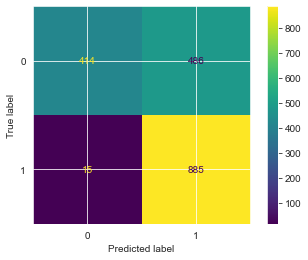

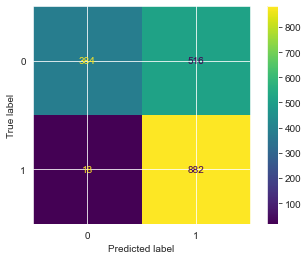

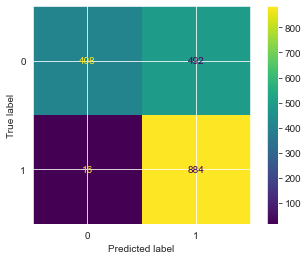

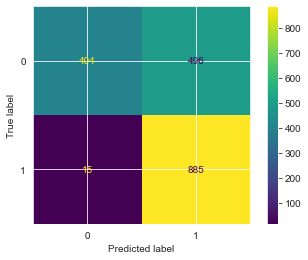

In [104]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

h = 0.02  # step size in the mesh

names = [
    "Gradient Boosting",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

def training(train, test, model, y_train, y_test):
    x_train = train
    x_test = test
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plot_confusion_matrix(model, x_train,y_train)
    print(classification_report(y_test,y_pred,digits = 4))

for name, clf in zip(names, classifiers):
    print(name)
    skf = StratifiedKFold(n_splits=10)
    fold_no = 1
    for train_index,test_index in skf.split(X, y):
        train = X.iloc[train_index,:]
        test = X.iloc[test_index,:]
        y_train = y.iloc[train_index,:]
        y_test = y.iloc[test_index,:]
        training(train, test, clf,y_train,y_test)
        fold_no += 1

In [50]:
y_train = X.iloc[[1,2,3],:]

In [54]:
type(X)

pandas.core.frame.DataFrame